# Audi Used Car Price Regression (SKlearn)

In [1]:
import math

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler

import statsmodels.api as sm

In [2]:
np.random.seed(42)

In [3]:
data = pd.read_csv("../data/used-cars/audi.csv")

data = data.rename(
    {
        "model": "model",
        "year": "year",
        "price": "price",
        "transmission": "transmission",
        "mileage": "mileage",
        "model": "model",
        "fuelType": "fuel_type",
        "tax": "tax",
        "mpg": "mpg",
        "engineSize": "engine_size",
    },
    axis=1,
)

data = data.reindex(sorted(data.columns), axis=1)

In [4]:
print("--------------------------------------------------")
print("Sample")
print("--------------------------------------------------")

data.sample(10)

--------------------------------------------------
Sample
--------------------------------------------------


,engine_size,fuel_type,mileage,model,mpg,price,tax,transmission,year
10442,2.0,Diesel,49500,A4,62.8,9990,30,Manual,2012
2907,1.6,Diesel,4352,A3,51.4,22382,145,Manual,2019
7388,2.0,Diesel,7000,A6,47.9,28990,150,Semi-Auto,2019
3016,1.5,Petrol,3925,A3,44.1,30777,145,Semi-Auto,2020
7890,1.4,Petrol,22000,A4,51.4,14950,145,Manual,2016
483,1.6,Diesel,3578,Q2,47.9,24365,145,Manual,2019
5799,3.0,Diesel,22639,Q7,48.7,30495,165,Semi-Auto,2016
6026,3.0,Diesel,14468,A7,52.3,29900,145,Semi-Auto,2017
1084,2.0,Diesel,25214,A4,74.3,15256,0,Manual,2016
7873,1.6,Diesel,789,Q2,47.9,24950,145,Semi-Auto,2020


In [5]:
print("--------------------------------------------------")
print("Data Types")
print("--------------------------------------------------")

for label, content in data.items():
    print(f"{label}: {content.dtypes}")

--------------------------------------------------
Data Types
--------------------------------------------------
engine_size: float64
fuel_type: object
mileage: int64
model: object
mpg: float64
price: int64
tax: int64
transmission: object
year: int64


In [6]:
print("--------------------------------------------------")
print("Missing Values")
print("--------------------------------------------------")

for label, content in data.items():
    print(f"{label}: {content.isna().sum()}")

--------------------------------------------------
Missing Values
--------------------------------------------------
engine_size: 0
fuel_type: 0
mileage: 0
model: 0
mpg: 0
price: 0
tax: 0
transmission: 0
year: 0


In [7]:
print("--------------------------------------------------")
print("Descriptive Statistics")
print("--------------------------------------------------")

data.describe().round(3)

--------------------------------------------------
Descriptive Statistics
--------------------------------------------------


,engine_size,mileage,mpg,price,tax,year
count,10668.000,10668.000,10668.00,10668.000,10668.000,10668.000
mean,1.931,24827.244,50.77,22896.685,126.011,2017.101
std,0.603,23505.257,12.95,11714.842,67.170,2.167
min,0.000,1.000,18.90,1490.000,0.000,1997.000
25%,1.500,5968.750,40.90,15130.750,125.000,2016.000
50%,2.000,19000.000,49.60,20200.000,145.000,2017.000
75%,2.000,36464.500,58.90,27990.000,145.000,2019.000
max,6.300,323000.000,188.30,145000.000,580.000,2020.000


--------------------------------------------------
Histograms
--------------------------------------------------


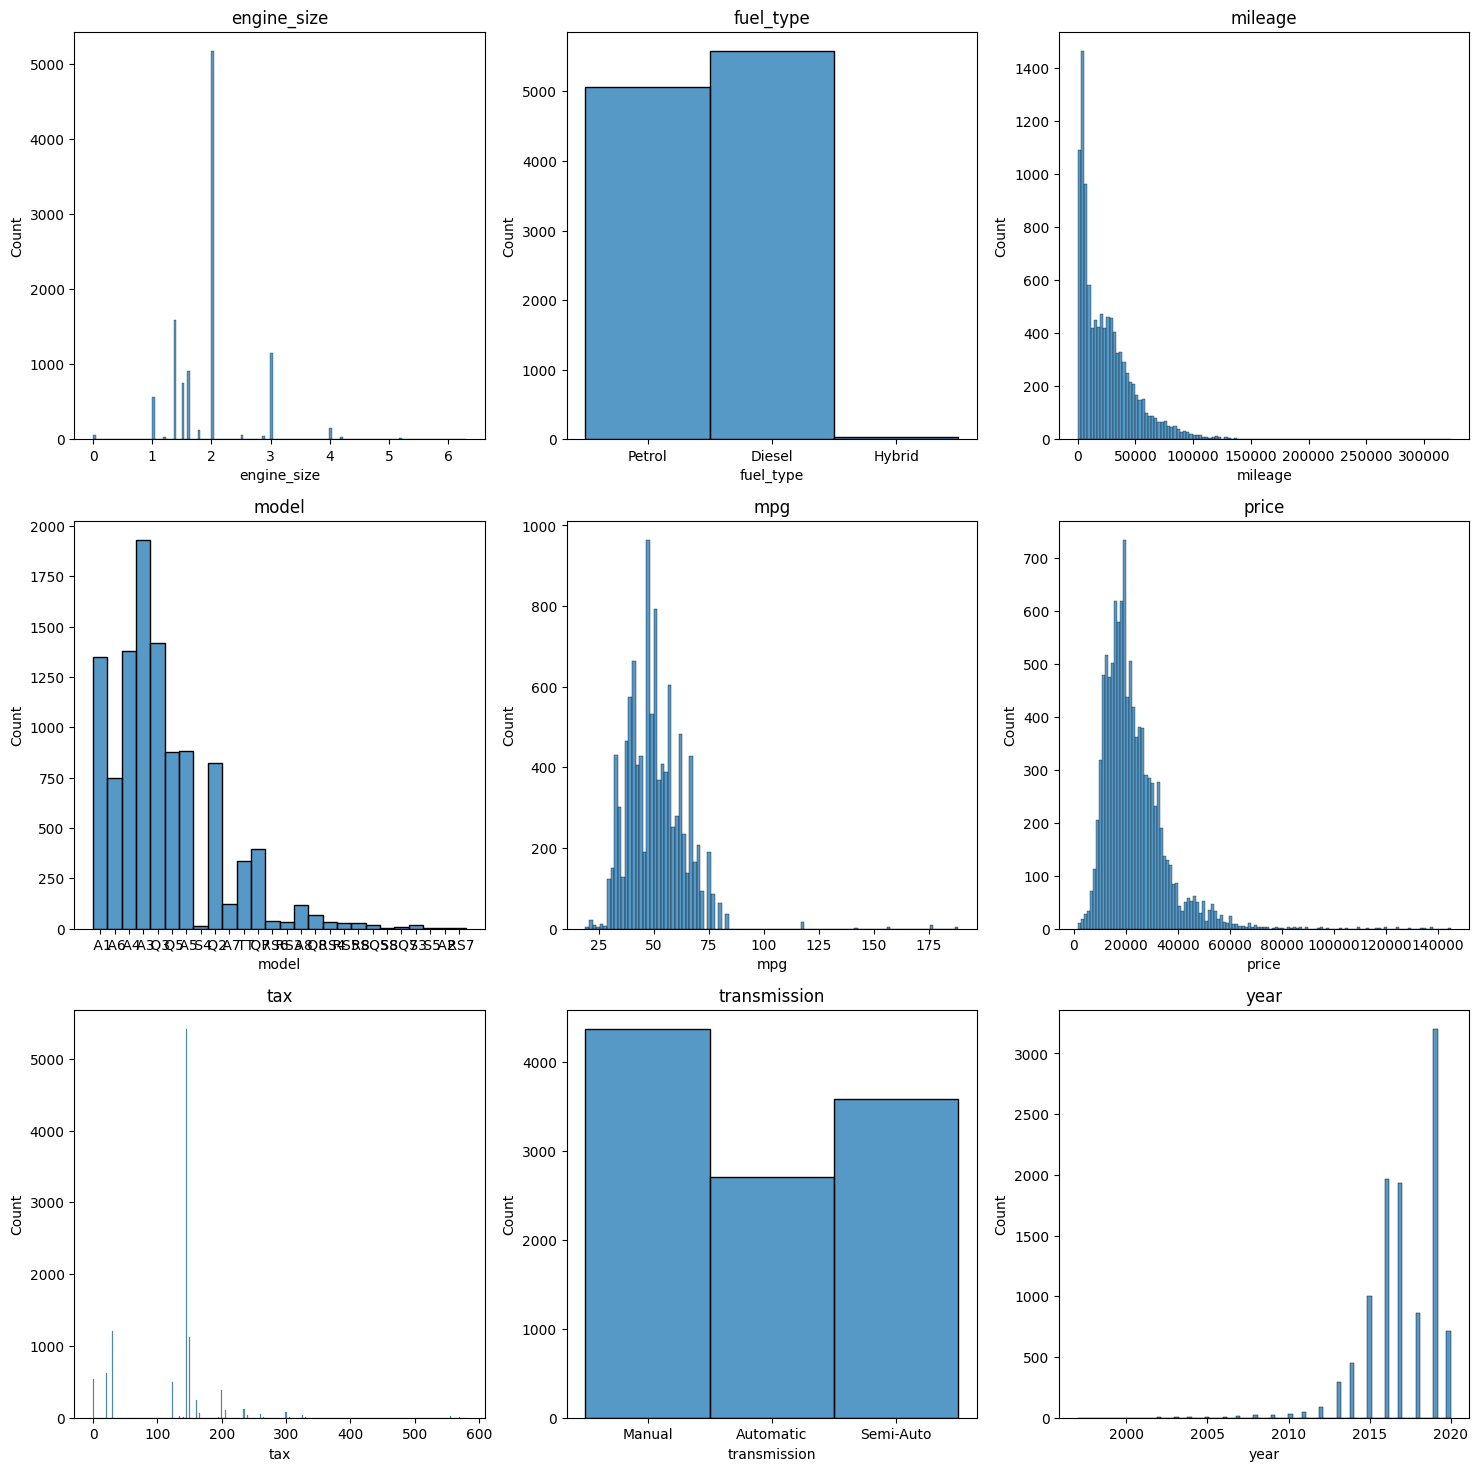

In [8]:
print("--------------------------------------------------")
print("Histograms")
print("--------------------------------------------------")

n_histograms = len(data.columns)
n_histogram_rows = math.ceil(n_histograms / 3)
fig, axes = plt.subplots(ncols=3, nrows=n_histogram_rows)
fig.set_size_inches(18, n_histogram_rows * 6)
axes = axes.flatten()

for index, column in enumerate(data.columns):
    ax = axes[index]
    ax.set_title(column)
    ax.set(xlabel=None, ylabel=None)
    sns.histplot(data[column], ax=ax)

In [9]:
print("--------------------------------------------------")
print("Feature Types")
print("--------------------------------------------------")

cat_features = ["fuel_type", "model", "transmission"]
num_features = ["engine_size", "mileage", "mpg", "tax", "year"]

print(f"Categorical Features: {cat_features}")
print(f"Numeric Features: {num_features}")

--------------------------------------------------
Feature Types
--------------------------------------------------
Categorical Features: ['fuel_type', 'model', 'transmission']
Numeric Features: ['engine_size', 'mileage', 'mpg', 'tax', 'year']


--------------------------------------------------
Q-Q Plots
--------------------------------------------------


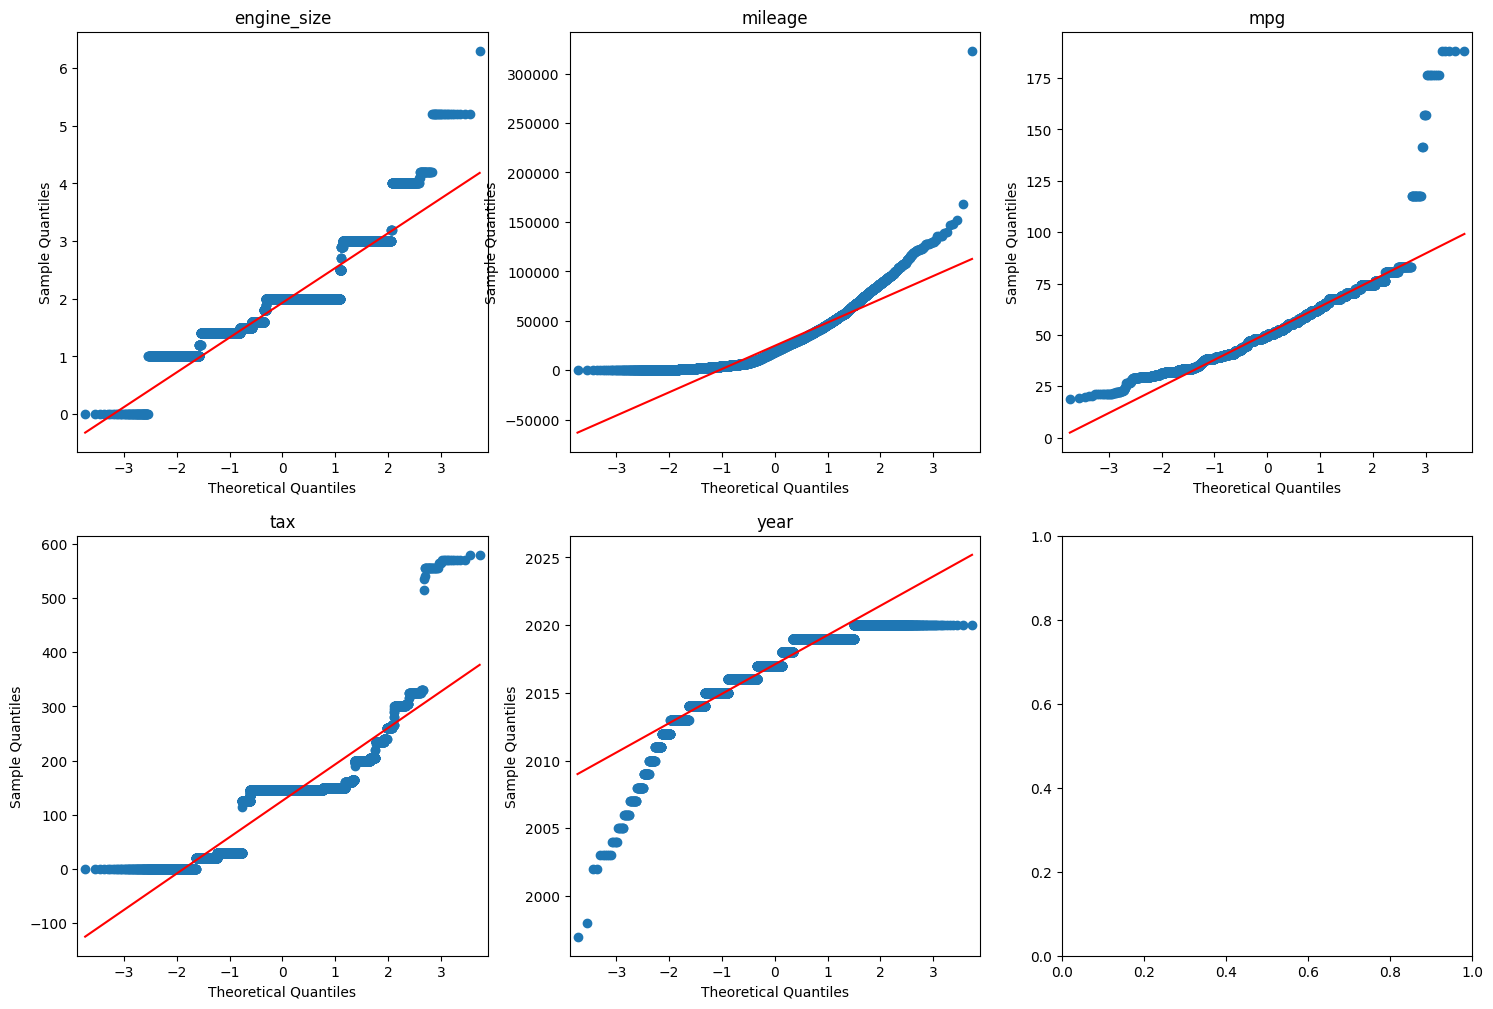

In [10]:
print("--------------------------------------------------")
print("Q-Q Plots")
print("--------------------------------------------------")

n_qqplots = len(data[num_features].columns)
n_qqplot_rows = math.ceil(n_qqplots / 3)
fig, axes = plt.subplots(ncols=3, nrows=n_qqplot_rows)
fig.set_size_inches(18, n_qqplot_rows * 6)
axes = axes.flatten()

for index, column in enumerate(data[num_features].columns):
    ax = axes[index]
    ax.set_title(column)
    ax.set(xlabel=None, ylabel=None)
    sm.qqplot(data[column], line="s", ax=ax)

--------------------------------------------------
Pairwise Relationships
--------------------------------------------------


c:\Users\danie\_data\courses\tensorflow\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


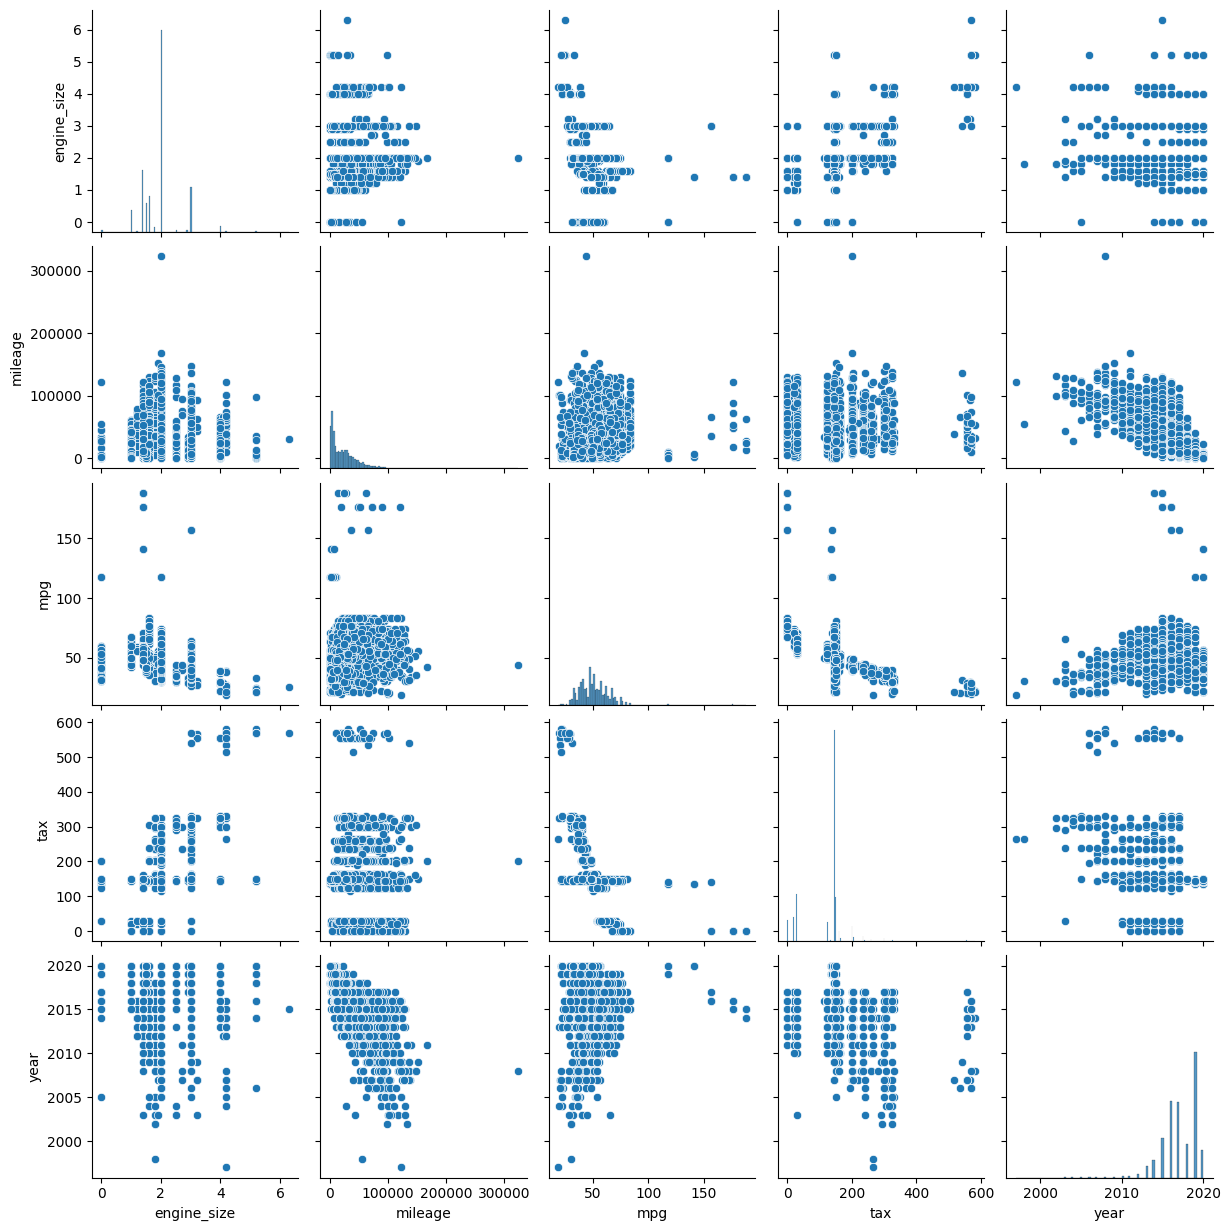

In [11]:
print("--------------------------------------------------")
print("Pairwise Relationships")
print("--------------------------------------------------")

sns.pairplot(data[num_features])

In [12]:
X = data.drop(["price"], axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
cat_features = ["fuel_type", "model", "transmission"]
num_features = ["engine_size", "mileage", "mpg", "tax", "year"]

In [14]:
X = data.drop(["price"], axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

imputer = ColumnTransformer(
    [
        (
            "imputer_cat",
            SimpleImputer(strategy="most_frequent", add_indicator=True),
            cat_features,
        ),
        (
            "imputer_num",
            SimpleImputer(strategy="median", add_indicator=True),
            num_features,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

robust_scaler = ColumnTransformer(
    [
        (
            "robust_scaler",
            RobustScaler(),
            num_features,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

minmax_scaler = ColumnTransformer(
    [
        (
            "minmax_scaler",
            MinMaxScaler(feature_range=(0, 1)),
            num_features,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

encoder = ColumnTransformer(
    [
        (
            "encoder_cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            cat_features,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

estimator = RandomForestRegressor()

In [15]:
estimator = RandomForestRegressor()

pipeline = Pipeline(
    [
        ("imputer", imputer),
        ("robust_scaler", robust_scaler),
        ("minmax_scaler", minmax_scaler),
        ("encoder", encoder),
        ("estimator", estimator),
    ],
).set_output(transform="pandas")

pipeline.fit(X_train, y_train)

pipeline_score_test = pipeline.score(X_test, y_test)
pipeline_score_train = pipeline.score(X_train, y_train)

print("------------------------------------------------------------")
print("Base Model")
print("------------------------------------------------------------")
print(f"Test Score: {pipeline_score_test.round(4)}")
print(f"Train Score: {pipeline_score_train.round(4)}")

------------------------------------------------------------
Base Model
------------------------------------------------------------
Test Score: 0.958
Train Score: 0.9939


In [16]:
model = GridSearchCV(
    pipeline,
    {
        "estimator__max_features": [0.25, 0.5, 1],
        "estimator__min_samples_leaf": [1, 2, 4],
        "estimator__n_estimators": [50, 100, 200],
    },
    cv=5,
    verbose=2,
)

model.fit(X_train, y_train)

model_params = model.best_params_

model_score_test = model.score(X_test, y_test)
model_score_train = model.score(X_train, y_train)

print("------------------------------------------------------------")
print("Hypertuned Model")
print("------------------------------------------------------------")
print(f"Model Parameters: {model_params}")
print(f"Test Score: {model_score_test.round(4)}")
print(f"Train Score: {model_score_train.round(4)}")
print("------------------------------------------------------------")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=50; total time=   0.8s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=50; total time=   0.8s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=50; total time=   0.8s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=50; total time=   0.8s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=50; total time=   0.9s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=100; total time=   2.1s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=100; total time=   1.9s
[CV] END estimator__max_features=0.25, estimator__min_samples_leaf=1, estimator__n_estimators=100; total time=   1.7s

In [17]:
best_estimator = RandomForestRegressor(
    max_features=model_params["estimator__max_features"],
    min_samples_leaf=model_params["estimator__min_samples_leaf"],
    n_estimators=model_params["estimator__n_estimators"],
)

best_model = Pipeline(
    [
        ("imputer", imputer),
        ("robust_scaler", robust_scaler),
        ("minmax_scaler", minmax_scaler),
        ("encoder", encoder),
        ("estimator", best_estimator),
    ],
)

scores = {
    "mae": abs(
        cross_val_score(
            best_model,
            X,
            y,
            cv=5,
            scoring="neg_mean_absolute_error",
        ).mean()
    ),
    "mse": abs(
        cross_val_score(
            best_model,
            X,
            y,
            cv=5,
            scoring="neg_mean_squared_error",
        ).mean()
    ),
    "msle": abs(
        cross_val_score(
            best_model,
            X,
            y,
            cv=5,
            scoring="neg_mean_squared_log_error",
        ).mean()
    ),
    "r2": abs(
        cross_val_score(
            best_model,
            X,
            y,
            cv=5,
            scoring="r2",
        ).mean()
    ),
    "mape": abs(
        cross_val_score(
            best_model,
            X,
            y,
            cv=5,
            scoring="neg_mean_absolute_percentage_error",
        ).mean()
    ),
}

print("------------------------------------------------------------")
print("Cross-validated Model")
print("------------------------------------------------------------")
print(f"Mean Absolute Error: {scores['mae'].round(4)}")
print(f"Mean Squared Error: {scores['mse'].round(4)}")
print(f"Mean Squared Log Error: {scores['msle'].round(4)}")
print(f"R Squared: {scores['r2'].round(4)}")
print(f"Mean Absolute Percentage Error: {scores['mape'].round(4)}")

------------------------------------------------------------
Cross-validated Model
------------------------------------------------------------
Mean Absolute Error: 1582.8878
Mean Squared Error: 6163922.6195
Mean Squared Log Error: 0.0131
R Squared: 0.9529
Mean Absolute Percentage Error: 0.0785
